<a href="https://www.kaggle.com/code/benfoglia/titanic-ml-competition-random-forest?scriptVersionId=133328625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import Necessary Libraries

In [1]:
# Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 2. Load Dataset

In [2]:
# Load the dataset

train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# 3. Explore Dataset

In [3]:
# Explore train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Explore data types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Survived', ylabel='count'>

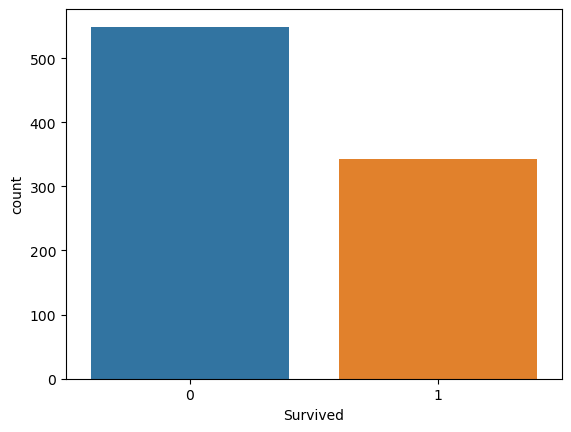

In [5]:
# Data visualization
sns.countplot(x='Survived', data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

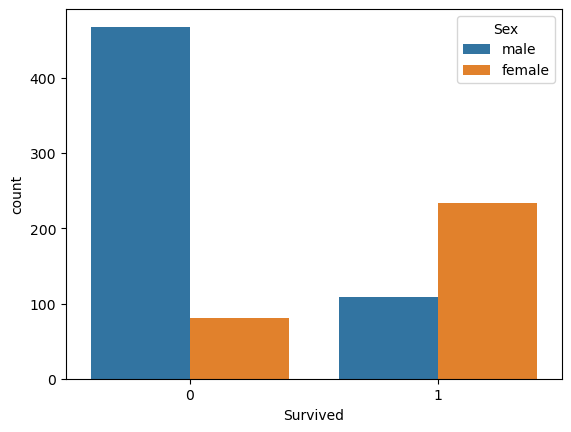

In [6]:
# Explore relationships between features
sns.countplot(x='Survived', hue='Sex', data=train_df)

# 4. Data Preprocessing

In [7]:
# Check which columns have missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing values for 'Age' feature
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop the 'Cabin' feature
train_df.drop("Cabin", axis=1, inplace=True)

# Handle categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

#Check new dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


# 5. Feature Engineering

In [9]:
# Create 'FamilySize' feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# 6. Split Dataset

In [10]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=900)

# 7. Model Selection and Training

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# 8. Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
val_preds = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_val, val_preds))

Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       113
           1       0.82      0.74      0.78        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



# 9. Perform Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Re-train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Predict on the validation set using the best model
val_preds = best_model.predict(X_val)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_val, val_preds))

Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



# 10. Make Predictions

In [14]:
#Check null values in test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Preprocess the test dataset
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Make predictions on the test set
test_preds = model.predict(test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1))


# 11. Prepare Submission File

In [16]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_preds})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
